# Clasificadores lineales y no lineales

Al igual que regresión logística binaria, regresión logística multinomial halla fronteras lineales que, no obstante, pueden emplearse con datos no linealmente separables mediante linearización de los mismos en preproceso.

**Ejemplo:** $\;C=3$, $\;\boldsymbol{x}=(x_1,x_2)^t$, $\;\phi(\boldsymbol{x})=(1, x_1, x_2, x_1^2, x_2^2, x_1x_2)^t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import multivariate_normal as mvn
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as mcol

In [2]:
np.random.seed(234) # np.random.RandomState(0)
N, S = 100, 0.01 * np.eye(2)
Gs = [mvn(mean=[0.5, 0.5], cov=S), mvn(mean=[-0.5, -0.5], cov=S), mvn(mean=[0.5, -0.5], cov=S), mvn(mean=[-0.5, 0.5], cov=S), mvn(mean=[0, 0], cov=S)]
X = np.concatenate([G.rvs(size=N) for G in Gs])
y = np.concatenate((1 * np.ones(N), 1 * np.ones(N), 2 * np.ones(N), 2 * np.ones(N), 3 * np.ones(N)))
print(np.c_[X[:min(N, 10), :], y[:min(N, 10)]])

[[0.58187916 0.39564494 1.        ]
 [0.53509007 0.59215783 1.        ]
 [0.49126181 0.18711154 1.        ]
 [0.40302673 0.59346658 1.        ]
 [0.50438663 0.64252155 1.        ]
 [0.44429373 0.59268244 1.        ]
 [0.37164463 0.60962569 1.        ]
 [0.30675275 0.54789592 1.        ]
 [0.63445896 0.48245793 1.        ]
 [0.49172956 0.41115453 1.        ]]


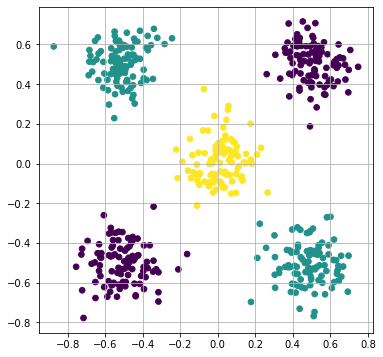

In [3]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
XX = np.c_[np.ravel(xx), np.ravel(yy)]

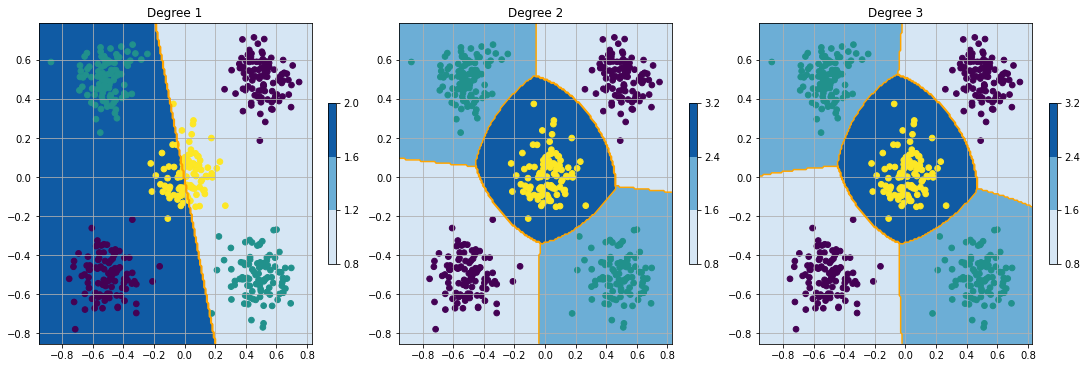

In [4]:
degrees = [1, 2, 3]; nrows, ncols = 1, 3
C=1e4 # C = 1 / lambda: varianza del prior
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5), constrained_layout=True)
for i, degree in enumerate(degrees):
    ax = axes.flat[i]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, i + 1); ax.grid()
    transformer = PolynomialFeatures(degree)
    X_poly = transformer.fit_transform(X)[:, 1:] # skip the first column of 1s
    model = LogisticRegression(C=C, max_iter=1000).fit(X_poly, y)
    XX_poly = transformer.fit_transform(XX)[:, 1:] # skip the first column of 1s
    zz = model.predict(XX_poly)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 2, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.scatter(*X.T, c=y, s=32)
    ax.set_title(f'Degree {degree}')